# Trabalho 8

Importando as bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

Construindo os DataFrames

In [ ]:
df1 = pd.DataFrame( # Criando o dataframe da tabela do slide 9.
    {
        'NC': [
            2, 0, 2, 0, 5, 4, 3, 0, 0, 3, 
            2, 2, 1, 2, 4, 1, 5, 3, 3, 4,
        0, 2, 3, 0, 0, 2, 2, 1, 3, 1
        ]
    }
)
df2 = pd.DataFrame( # Criando o dataframe da tabela do slide 37.
    {
        'c': [
        2, 4, 2, 0, 3, 1, 2, 4, 2, 2, 
        5, 4, 2, 4, 5, 1, 1, 1, 1, 3,
        1, 5, 2, 6, 3, 2, 3, 0, 3, 1,
        5, 1, 2, 1, 6, 2, 1, 2, 4, 1
        ]
    }
)

## Questão 1

Plote os gráficos de controle $np$ e $p$ para os dados apresentados no slide 9

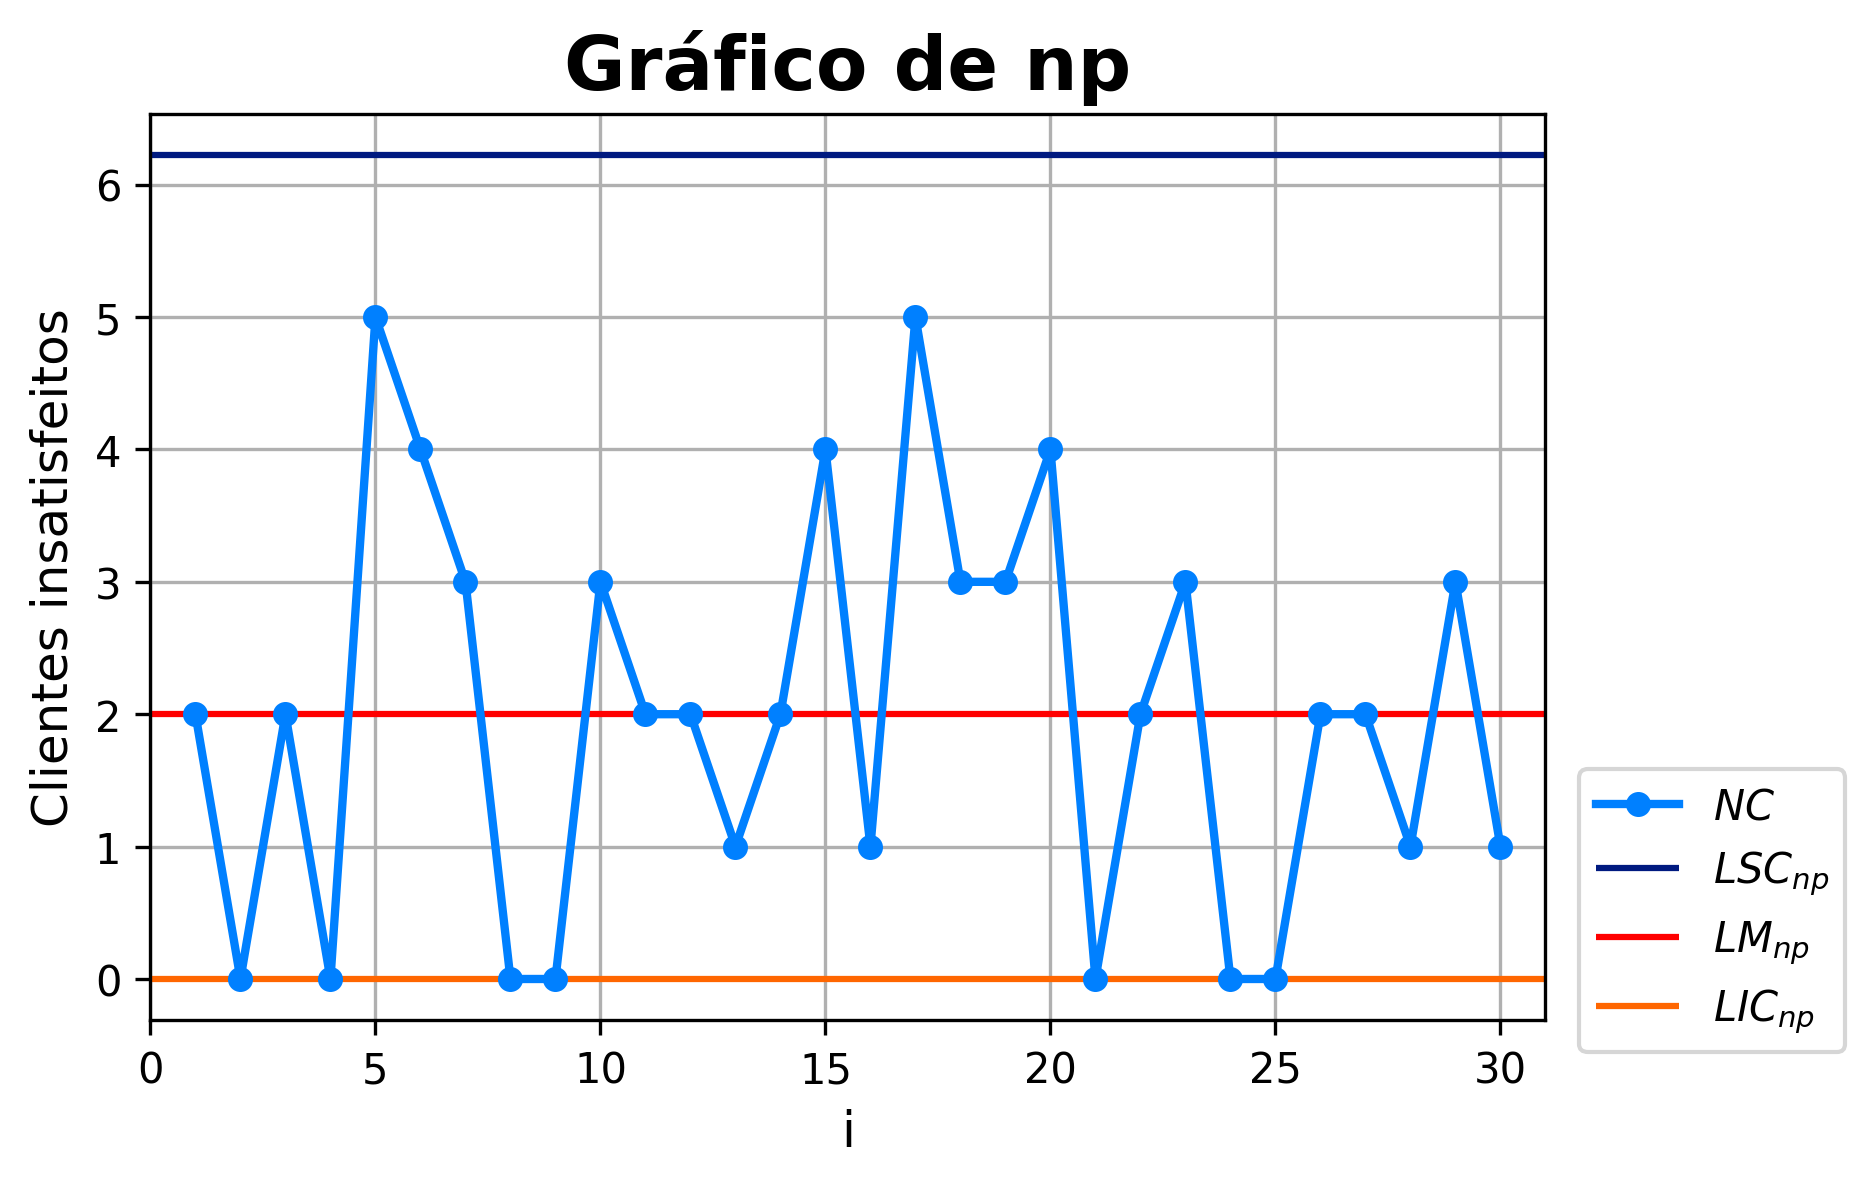

In [ ]:
def grafico_np(df, n, D): #Função que constrói o gráfico de np de um dataframe.

  # DEFININDO AS VARÍAVEIS

  df = pd.DataFrame(df) #Armazenando o dataframe.
  df.columns = ['NC'] #Renomeia a coluna.
  D = str(D) #String que descreve o atributo D.
  n = int(n) #Tamanho de cada amostra.
  m = len(df) #Quantidade de amostras.
  p = df['NC'].sum()/(n*m) #Probabilidade estimada de encontrar um item na amostra com o atributo de interesse.
  muD = n * p #Média da distribuição.
  sigmaD = (n*p*(1 - p))**0.5 #Desvio padrão da distribuição
  LSC_np = muD + 3*sigmaD #Calculando a Linha Superior Central de np.
  LM_np = muD #Calculando a Linha Média de np.
  LIC_np = max(0, muD - 3*sigmaD) #Calculando a Linha Inferior Central de np.

  #CONSTRUINDO O GRÁFICO DE NP:
  
  plt.plot( # Adiciona os valores de NC.
    range(1, len(df) + 1),
    df['NC'],
    color = (0, 0.5, 1),
    linewidth = 2,
    marker = 'o',
    markerfacecolor = (0, 0.5, 1),
    markersize = 5
  )
  plt.hlines( # Adiciona a Linha Superior de Controle de np.
    LSC_np,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (0, 0.1, 0.5)
  )
  plt.hlines( # Adiciona a Linha Média de np.
    LM_np,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0, 0)
  )
  plt.hlines( # Adiciona a Linha Inferior de Controle de np.
    LIC_np,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0.4, 0)
  )
  plt.legend(['$NC$', '$LSC_{np}$', '$LM_{np}$', '$LIC_{np}$'], loc = 'best', bbox_to_anchor = (1.23, 0.3))
  plt.grid(True)
  plt.title( # Adiciona o título com a formatação.
    "Gráfico de np", 
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel( # Adiciona um título para o eixo horizontal.
    "i",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1)
  plt.ylabel( # Adiciona o título para o eixo vertical.
    D,
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_np.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  plt.close() #Fecha a área de plotagem do gráfico.
  
  grafico_np = Image.open('Gráfico_np.png') #Armazena o gráfico de S em uma variável.

  return {'Dataframe': df, 'Gráfico': grafico_np}

def grafico_p(df, n, D): #Função que constrói o gráfico de p de um dataframe.

  # DEFININDO AS VARÍAVEIS

  df = pd.DataFrame(df) #Armazenando o dataframe.
  df.columns = ['NC'] #Renomeia a coluna.
  D = str(D) #String que descreve o atributo D.
  n = int(n) #Tamanho de cada amostra.
  m = len(df) #Quantidade de amostras.
  p = df['NC'].sum()/(n*m) #Probabilidade estimada de encontrar um item na amostra com o atributo de interesse.
  mu_p = p #Média da distribuição.
  sigma_p = (p*(1 - p)/n)**0.5 #Desvio padrão da distribuição
  LSC_p = mu_p + 3*sigma_p #Calculando a Linha Superior Central de p.
  LM_p = mu_p #Calculando a Linha Média de p.
  LIC_p = max(0, mu_p - 3*sigma_p) #Calculando a Linha Inferior Central de p.

  # CONSTRUINDO A COLUNA P QUE DEFINE A PROPORÇÃO DE CADA AMOSTRA
  i = 0
  df['p'] = pd.Series(float)
  while i < len(df):
    df.loc[i, 'p'] = df.loc[i, 'NC']/n
    i += 1

  #CONSTRUINDO O GRÁFICO DE NP:
  
  plt.plot( # Adiciona os valores de NC.
    range(1, len(df) + 1),
    df['p'],
    color = (0, 0.5, 1),
    linewidth = 2,
    marker = 'o',
    markerfacecolor = (0, 0.5, 1),
    markersize = 5
  )
  plt.hlines( # Adiciona a Linha Superior de Controle de p.
    LSC_p,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (0, 0.1, 0.5)
  )
  plt.hlines( # Adiciona a Linha Média de p.
    LM_p,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0, 0)
  )
  plt.hlines( # Adiciona a Linha Inferior de Controle de p.
    LIC_p,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0.4, 0)
  )
  plt.legend(['$p_{i}$', '$LSC_{p}$', '$LM_{p}$', '$LIC_{p}$'], loc = 'best', bbox_to_anchor = (1.23, 0.3))
  plt.grid(True)
  plt.title(
    "Gráfico de p",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "i",
    fontdict = {
      'family':'DejaVu Sans', 
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    D,
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_p.png', format = 'png', dpi = 300, bbox_inches = 'tight')
  plt.close()
  
  grafico_p = Image.open('Gráfico_p.png')

  return {'Dataframe': df, 'Gráfico': grafico_p}

NP = grafico_np(df = df1['NC'], n = 200, D = 'Clientes insatisfeitos') #Armazenando o gráfico de np em uma variável.
P = grafico_p(df = df1['NC'], n = 200, D = 'Clientes insatisfeitos') #Armazenando o gráfico de p em uma variável.
NP['Gráfico'] #Exibe o gráfico de np.

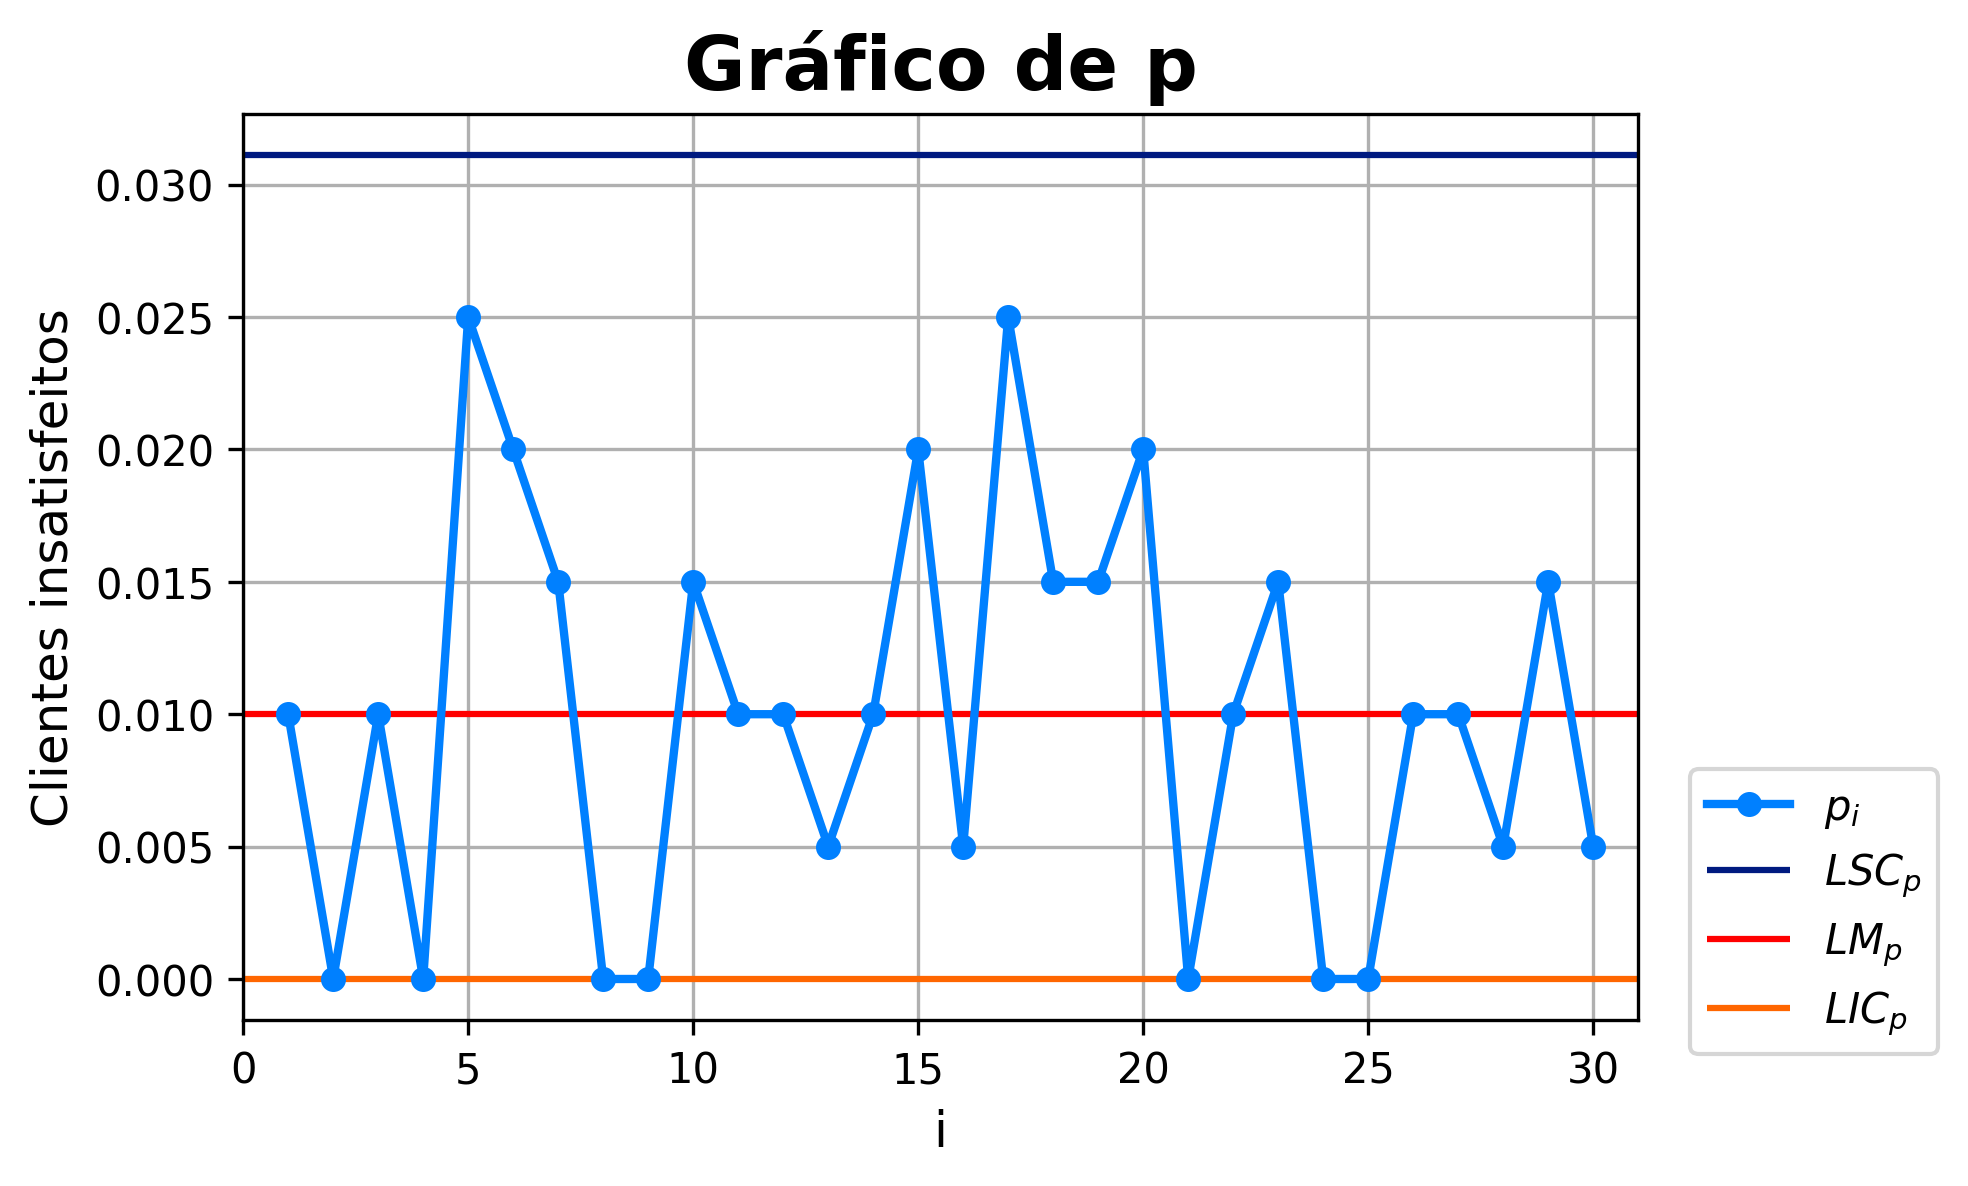

In [62]:
P['Gráfico'] #Exibe o gráfico de p.

# Questão 2

Plote os gráficos de controle $c$ e $u$ para os dados apresentados no slide 37

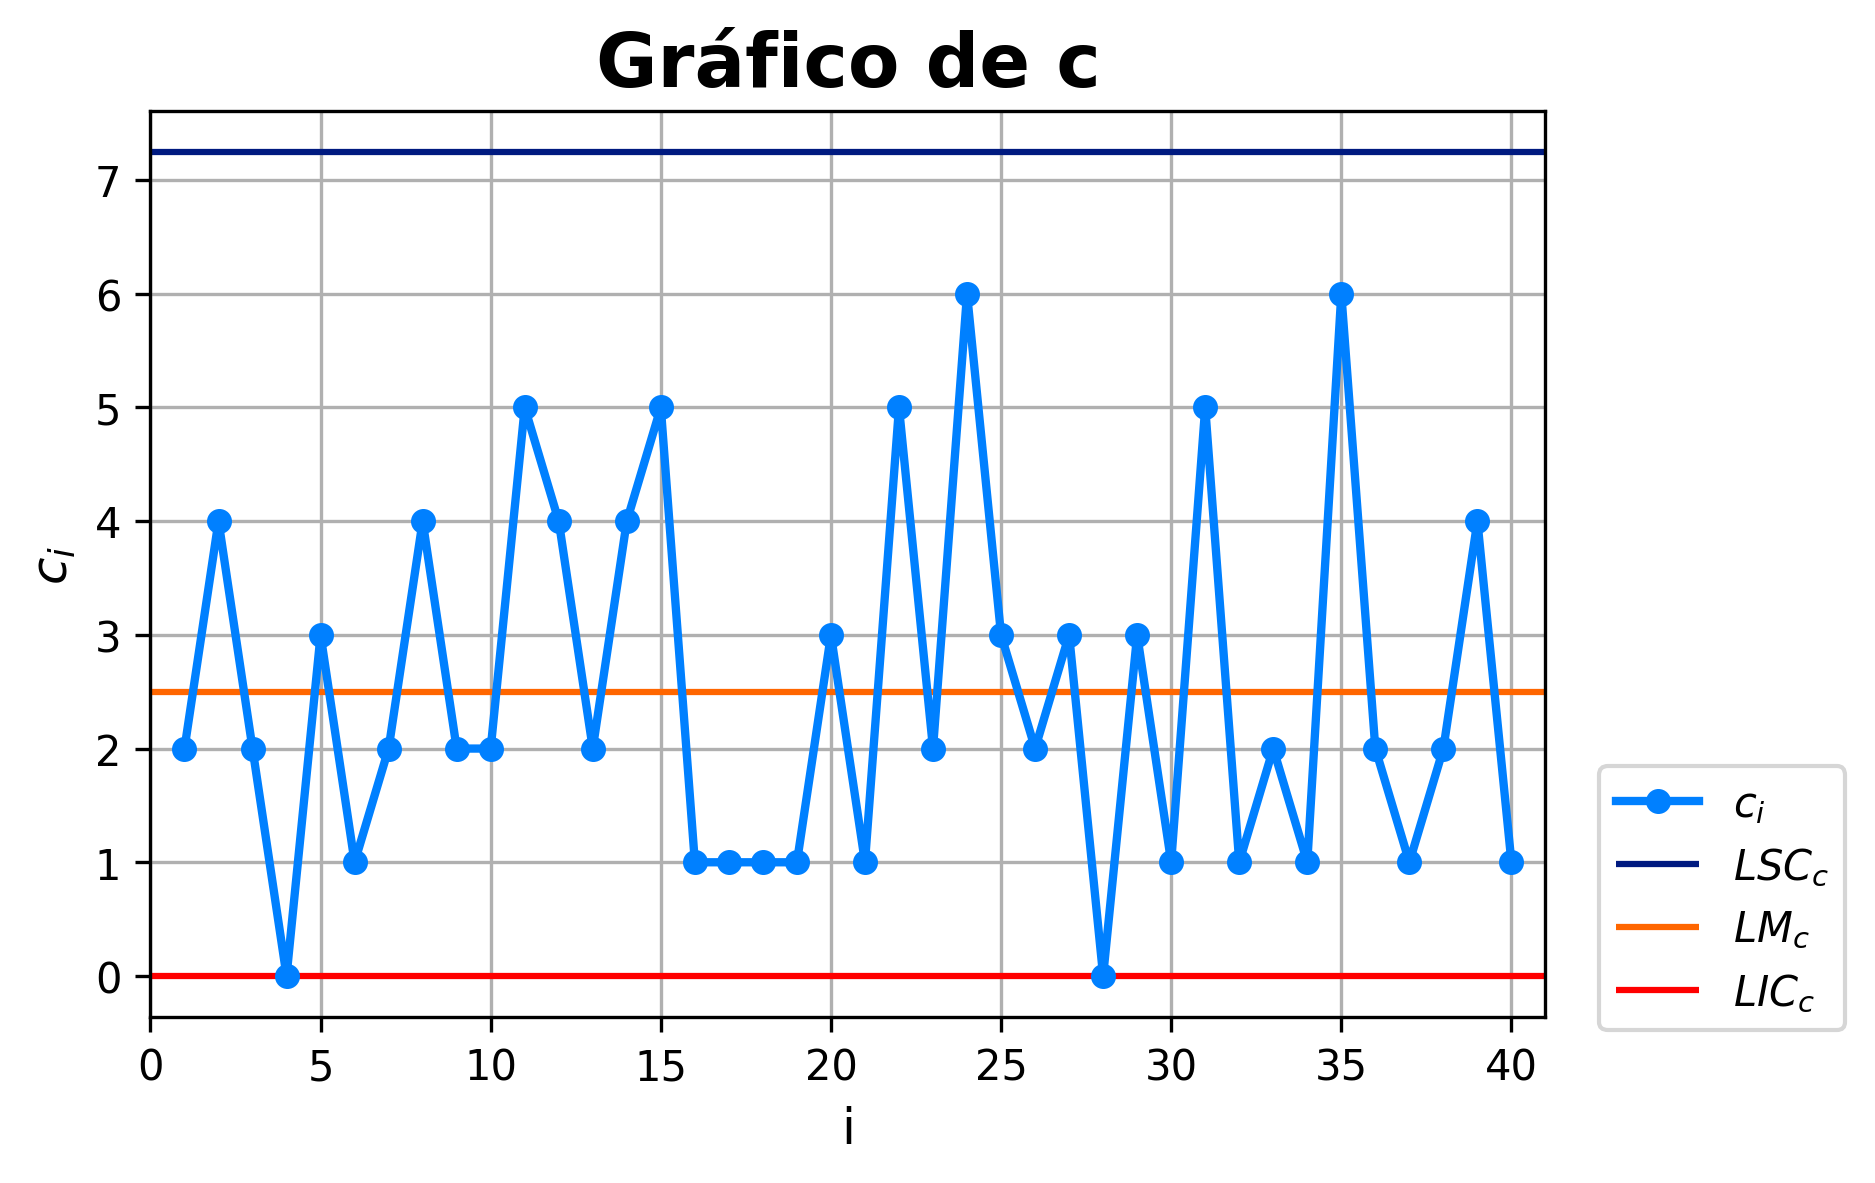

In [ ]:
def grafico_c(df, D): # Função que constrói o gráfico de c de um dataframe.

  # DEFININDO AS VARÍAVEIS

  df = pd.DataFrame(df) #Armazenando o dataframe.
  df.columns = ['c'] #Renomeia a coluna.
  D = str(D) #String que descreve o atributo D.
  m = len(df) #Quantidade de amostras.
  c = df['c'].sum()/m #Probabilidade estimada de encontrar um item na amostra com o atributo de interesse.
  LSC_c = c + 3*c**0.5 #Calculando a Linha Superior Central de c.
  LM_c = c #Calculando a Linha Média de c.
  LIC_c = max(0, c - 3*c**0.5) #Calculando a Linha Inferior Central de c.

  # CONSTRUINDO O GRÁFICO DE NP:

  plt.plot( # Adiciona os valores de C.
    range(1, len(df) + 1),
    df['c'],
    color = (0, 0.5, 1),
    linewidth = 2,
    marker = 'o',
    markerfacecolor = (0, 0.5, 1),
    markersize = 5
  )
  plt.hlines(LSC_c,
             xmin = 0,
             xmax = len(df) + 1,
             colors = (0, 0.1, 0.5)) #Adiciona a Linha Superior de Controle de c.
  plt.hlines(LM_c,
             xmin = 0,
             xmax = len(df) + 1,
             colors = (1, 0.4, 0)) #Adiciona a Linha Média de c.
  plt.hlines(LIC_c,
             xmin = 0,
             xmax = len(df) + 1,
             colors = (1, 0, 0)) #Adiciona a Linha Inferior de Controle de c.
  plt.legend(['$c_{i}$', '$LSC_{c}$', '$LM_{c}$', '$LIC_{c}$'], loc = 'best', bbox_to_anchor = (1.23, 0.3)) #Adiciona a legenda.
  plt.grid(True) #Adiciona grades de linhas.
  plt.title("Gráfico de c", fontdict = {'family':'DejaVu Sans',
                                         'color':'black',
                                         'weight':'bold',
                                         'size': 18}) #Adiciona o título com a formatação.
  plt.xlabel("i", fontdict = {'family':'DejaVu Sans',
                              'color':'black',
                              'weight': 12,
                              'size': 12}) #Adiciona um título para o eixo horizontal.
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(D, fontdict = {'family':'DejaVu Sans',
                            'color':'black',
                            'weight': 12,
                            'size': 12}) #Adiciona o título para o eixo vertical.
  plt.savefig('Gráfico_c.png', format = 'png', dpi = 300, bbox_inches = 'tight') #Salva o gráfico em formato png.
  plt.close() #Fecha a área de plotagem do gráfico.
  from PIL import Image #Importando biblioteca para manipulação de arquivos de imagem.
  grafico_c = Image.open('Gráfico_c.png') #Armazena o gráfico de S em uma variável.

  return {'Dataframe': df,
          'Gráfico': grafico_c} #Retorna um dicionário com as informações do gráfico de c.
        
def grafico_u(df, n, D): #Função que constrói o gráfico de u de um dataframe.

  #DEFININDO AS VARÍAVEIS:
  import pandas as pd #Importando a biblioteca que será usada.
  df = pd.DataFrame(df) #Armazenando o dataframe.
  df.columns = ['c'] #Renomeia a coluna.
  D = str(D) #String que descreve o atributo D.
  n = int(n) #Tamanho de cada amostra.
  m = len(df) #Quantidade de amostras.
  u = df['c'].sum()/(n*m) #Probabilidade estimada de encontrar um item na amostra com o atributo de interesse.
  LSC_u = u + 3*(u/n)**0.5 #Calculando a Linha Superior Central de u.
  LM_u = u #Calculando a Linha Média de u.
  LIC_u = max(0, u - 3*(u/n)**0.5) #Calculando a Linha Inferior Central de u.

  # CONSTRUINDO A COLUNA U QUE DEFINE A PROPORÇÃO DE CADA AMOSTRA:
  i = 0
  df['u'] = pd.Series(float)
  while i < len(df):
    df.loc[i, 'u'] = df.loc[i, 'c']/n
    i += 1

  # CONSTRUINDO O GRÁFICO DE NP

  plt.plot( # Adiciona os valores de C.
    range(1, len(df) + 1),
    df['u'],
    color = (0, 0.5, 1),
    linewidth = 2,
    marker = 'o',
    markerfacecolor = (0, 0.5, 1),
    markersize = 5
  ) 
  plt.hlines( # Adiciona a Linha Superior de Controle de c.
    LSC_u,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (0, 0.1, 0.5)
  )
  plt.hlines( # Adiciona a Linha Média de c.
    LM_u,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0.4, 0)
  )
  plt.hlines( # Adiciona a Linha Inferior de Controle de c.
    LIC_u,
    xmin = 0,
    xmax = len(df) + 1,
    colors = (1, 0, 0)
  )
  plt.legend(['$u_{i}$', '$LSC_{u}$', '$LM_{u}$', '$LIC_{u}$'], loc = 'best', bbox_to_anchor = (1.23, 0.3))
  plt.grid(True)
  plt.title(
    "Gráfico de u",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight':'bold',
      'size': 18
    }
  )
  plt.xlabel(
    "i",
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.xlim(left = 0, right = len(df) + 1) #Define o intervalo de exibição do eixo horizontal.
  plt.ylabel(
    D,
    fontdict = {
      'family':'DejaVu Sans',
      'color':'black',
      'weight': 12,
      'size': 12
    }
  )
  plt.savefig('Gráfico_u.png', format='png', dpi=300, bbox_inches='tight')
  plt.close()

  grafico_u = Image.open('Gráfico_u.png') #Armazena o gráfico de S em uma variável.

  return {'Dataframe': df, 'Gráfico': grafico_u}

C = grafico_c(df = df2['c'], D = '$c_{i}$') #Armazenando o gráfico de c em uma variável.
U = grafico_u(df = df2['c'], n = 5, D = '$u_{i}$') #Armazenando o gráfico de c em uma variável.
C['Gráfico'] #Exibe o gráfico de c.

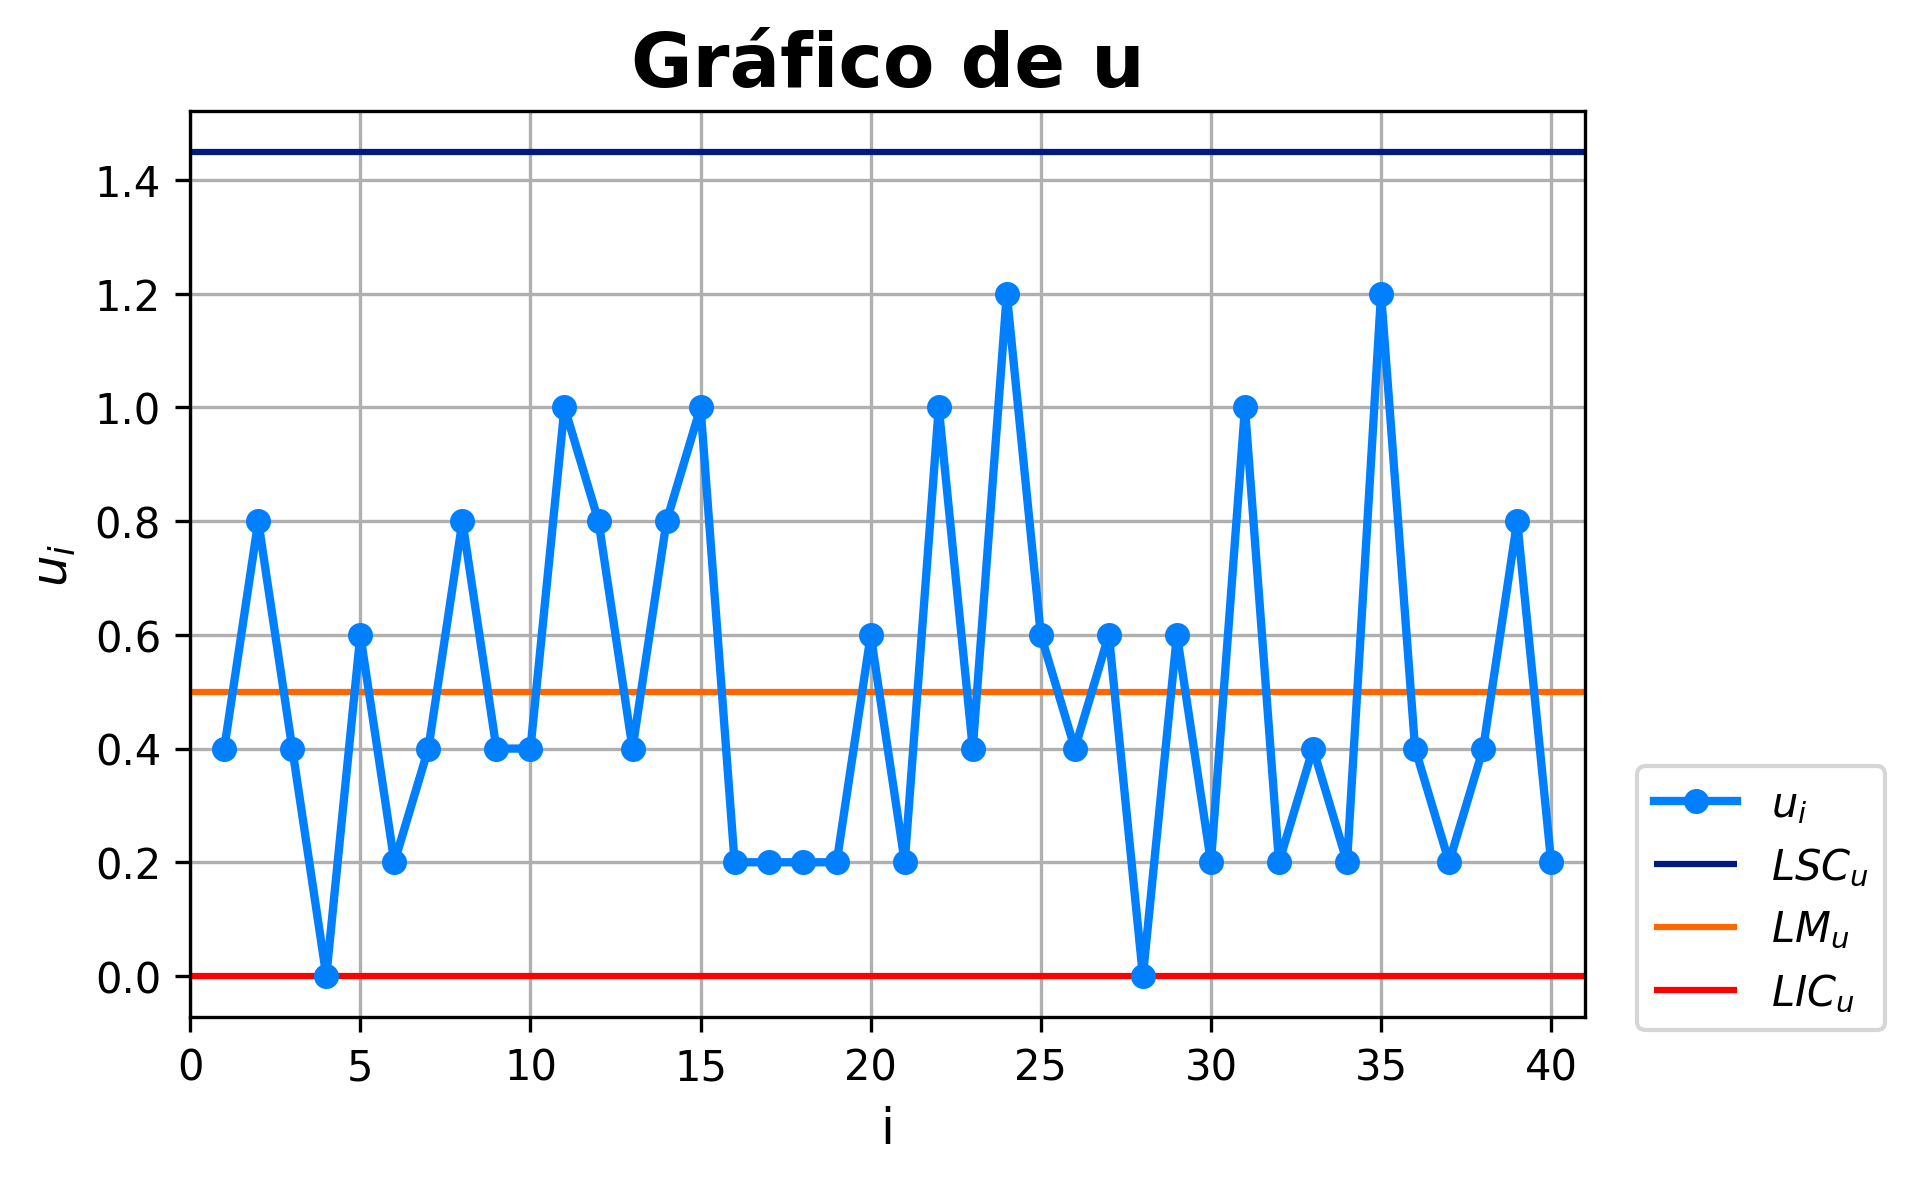

In [ ]:
U['Gráfico']